# Pre-model algorithms

## Exercise 1

In this code exercise, we will reduce a dataset to its two principal components.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import dataset

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

### Remove features

In [3]:
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']

df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

   Clicked on Ad  
0              0  
1              0  
2              0  
3              0  
4              0

### Scale data

In [4]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -1.        ],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538, -1.        ],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -1.        ],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.        ],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -1.        ],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 ,  1.        ]])

### Assign algorithm

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
scaled_pca = pca.transform(scaled_data)

In [6]:
# Query the number of rows and columns in the scaled dataframe
scaled_data.shape

(1000, 5)

In [7]:
# Query the number of rows and columns in the scaled PCA dataframe
scaled_pca.shape

(1000, 2)

### Visualize the output

#### Version 1: Visualized plot

Text(0, 0.5, 'Second Principal Component')

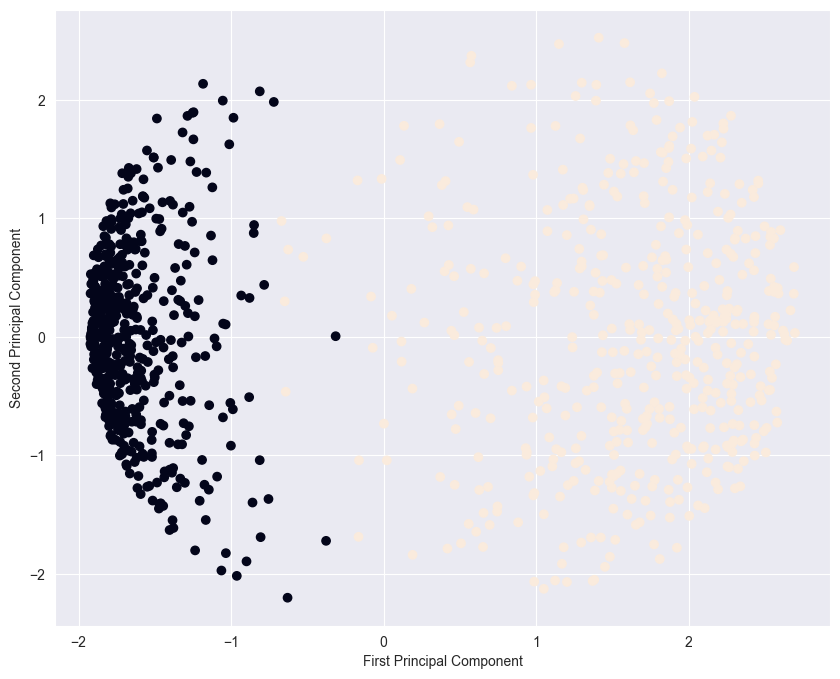

In [9]:
# State the size of the plot
plt.figure(figsize=(10, 8))

# Configure the scatterplot’s x and y axes as principal components 1 and 2, and color-coded by the variable Clicked on Ad
plt.scatter(scaled_pca[:, 0], scaled_pca[:, 1], c=df['Clicked on Ad'])

# State the scatterplot labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#### Version 2: Visualized plot with color legend

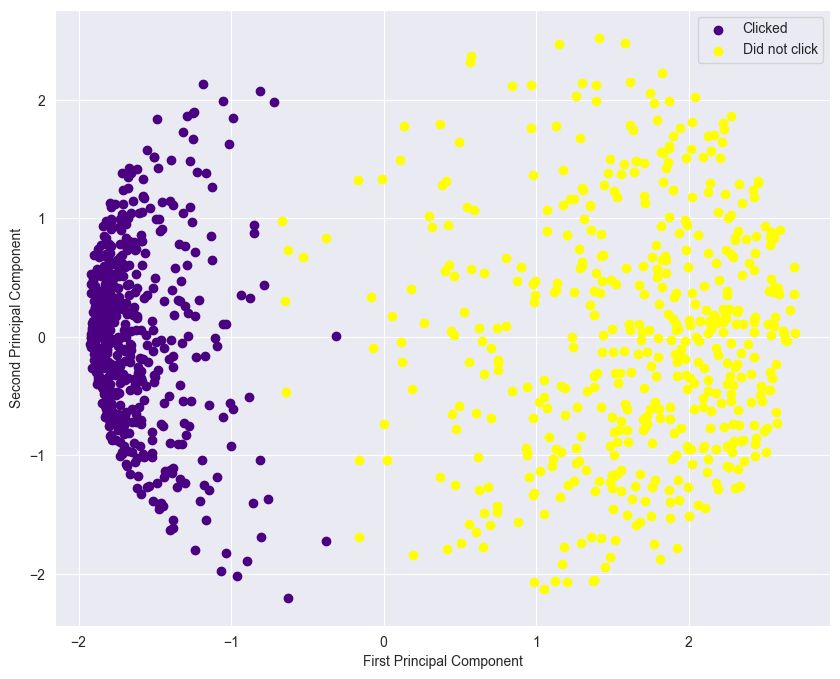

In [10]:
plt.figure(figsize=(10,8))
legend = df['Clicked on Ad']

#Add indigo and yellow RGB colors
colors = {0: '#4B0082', 1: '#FFFF00'}
labels = {0: 'Clicked', 1: 'Did not click'}

# Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t], label=labels[t])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

## k-Means Clustering

Another popular technique to reduce data complexity is k-means clustering, which is used for identifying groups of data points without prior knowledge of existing classes.

## Exercise 2

In this second exercise we will generate an artificial dataset and use k-means clustering to split the data into four natural groupings.

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

### Create blobs

In [12]:
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=4, random_state=10)

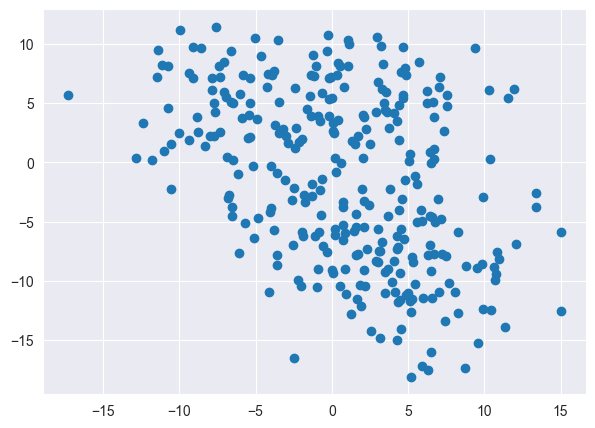

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1])

### Set algorithm

In [14]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

### Predict

In [15]:
model_predict = model.predict(X)
centroids = model.cluster_centers_
print(centroids)

[[-1.01492539 -5.23271226]
 [ 6.24946744 -9.70847466]
 [-7.03502629  4.80055552]
 [ 3.23209343  4.94623366]]


## Visualize the output

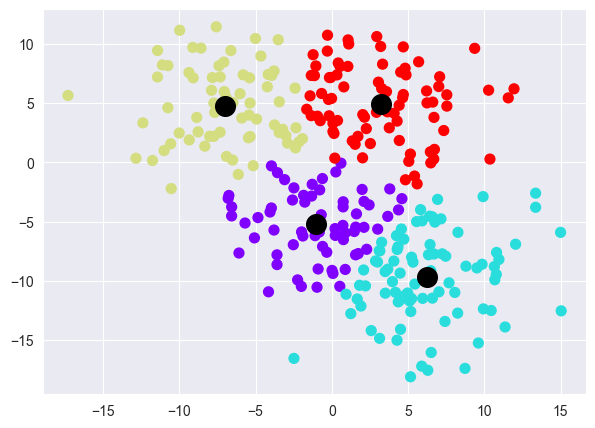

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=model_predict, s=50, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=1)

### Scree plot

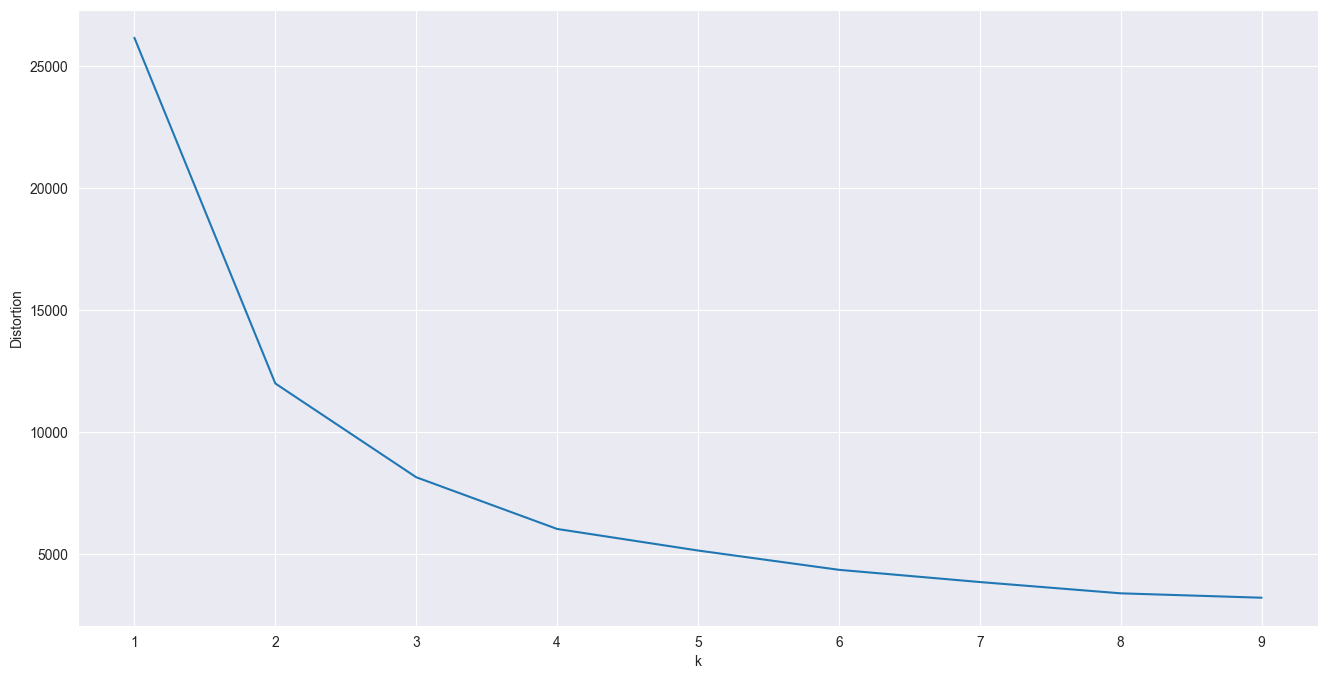

In [17]:
# Using a for loop, iterate the values of k with a range of 1-10 and find the values of distortion for each k value.
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X, y)
    distortions.append(model.inertia_)

#Generate plot with k on the x-axis and distortions on the y_axis using matplotlib
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()